# <center>Diwali Sales Analysis</center>

## Overview
In this project, we conducted a comprehensive analysis of Diwali sales data using Python and various data analysis libraries like **NumPy, Pandas, Matplotlib and Seaborn**. The primary aim of the analysis was to gain insights into customer behavior, purchasing trends, and key contributing factors to sales during the festive season. By leveraging data visualization and exploratory data analysis techniques, we delved into various aspects of the data to uncover meaningful patterns and observations.

## Project Description
The project involved the following steps:

**Data Import and Preliminary Analysis:**
We started by importing the Diwali sales data from a CSV file. Using Python libraries such as NumPy, Pandas, Matplotlib, and Seaborn, we loaded the dataset, examined its structure, and gained an initial understanding of the available columns.

**Data Cleaning and Preprocessing:**
Before proceeding with the analysis, we performed data cleaning and preprocessing steps. This included dropping irrelevant columns, handling missing values, and converting data types to appropriate formats.

**Exploratory Data Analysis:**
The heart of our analysis was the exploratory data analysis phase. We explored various aspects of the data, including gender distribution, age groups of buyers, sales across different states, marital status of customers, occupations, and popular product categories. Through visualizations like bar charts, we visually depicted trends, correlations, and insights in each of these categories.

In [1]:
# import python libraries

import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# import csv file
df = pd.read_csv('Diwali_Sales_Data.csv')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shadi_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,Married,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,Unmarried,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,Unmarried,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,Married,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,Unmarried,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Shadi_Status      11251 non-null  object 
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(3), object(9)
memory usage: 1.3+ MB


In [6]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [7]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Shadi_Status         0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
# drop null values
df.dropna(inplace=True)

In [9]:
#check data type of Amount column
df['Amount'].dtypes

dtype('float64')

In [10]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [11]:
df['Amount'].dtypes

dtype('int32')

In [12]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Shadi_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
#rename column
df.rename(columns= {'Shadi_Status':'Marital_Status'}, inplace=True)

In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [15]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,2.489634,9453.610553
std,1.716039e+03,12.753866,1.114967,5222.355168
min,1.000001e+06,12.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,4.000000,23952.000000


In [16]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

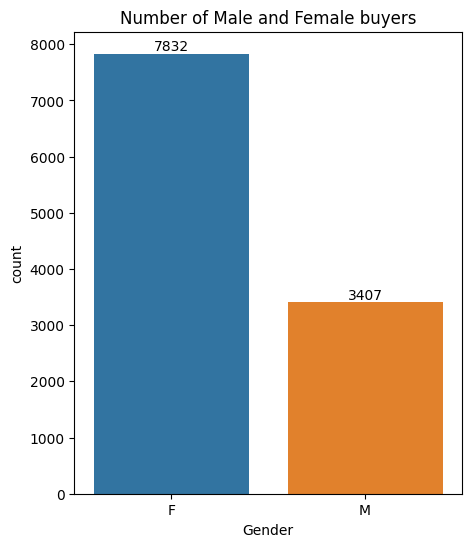

In [17]:
# plotting a bar chart for Gender and it's count

plt.figure(figsize=(5,6))
ax = sns.countplot(x = 'Gender',data = df)
plt.title('Number of Male and Female buyers')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

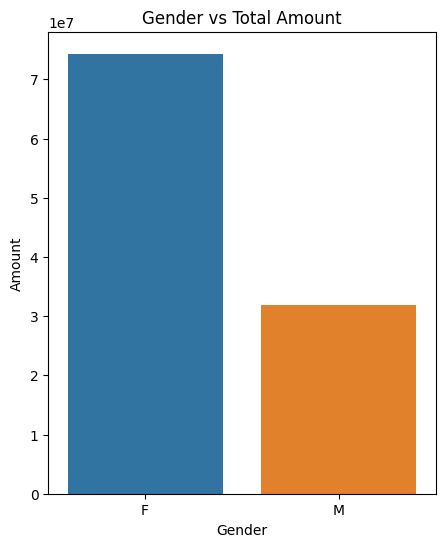

In [18]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

plt.figure(figsize=(5,6))
sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)
plt.title('Gender vs Total Amount')

plt.show()

- *From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men.*

### Age

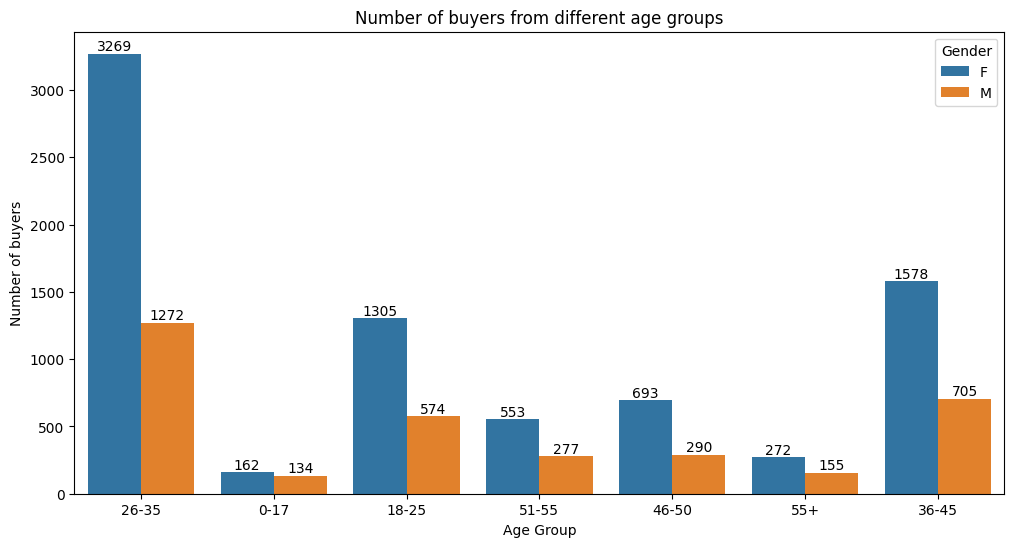

In [19]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of buyers')
plt.title('Number of buyers from different age groups')

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

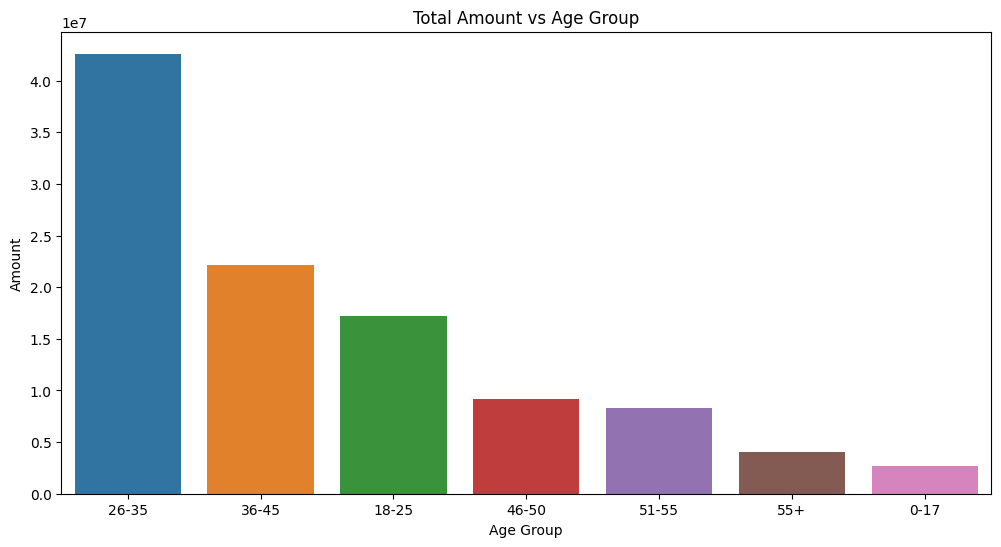

In [20]:
# Total Amount vs Age Group

sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)
plt.xlabel('Age Group')
plt.ylabel('Amount')
plt.title('Total Amount vs Age Group')

plt.show()

- *From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

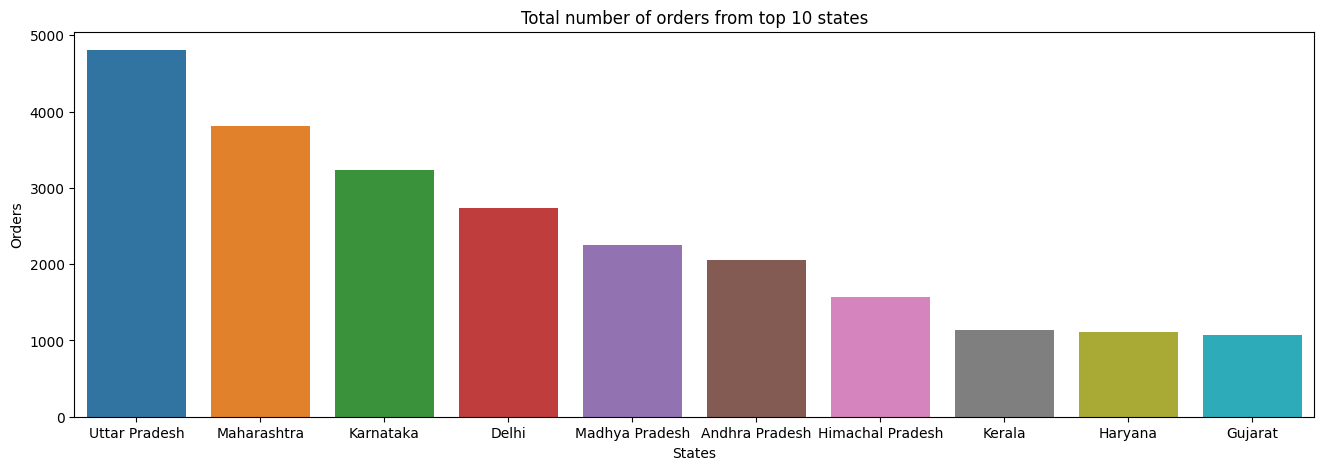

In [21]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

plt.figure(figsize=(16,5))
sns.barplot(data = sales_state, x = 'State',y= 'Orders')
plt.xlabel('States')
plt.ylabel('Orders')
plt.title('Total number of orders from top 10 states')

plt.show()

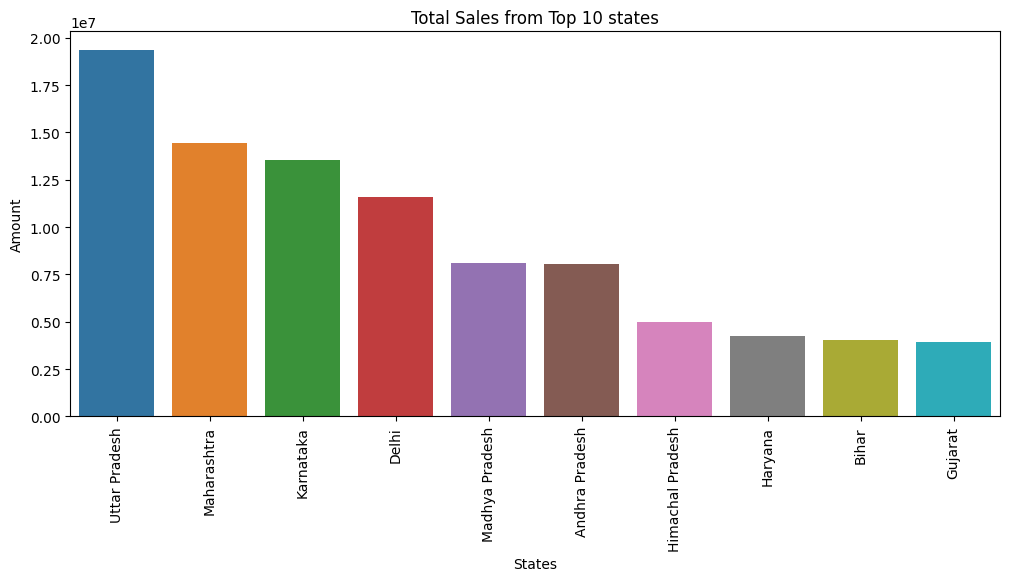

In [22]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(data = sales_state, x = 'State',y= 'Amount')
plt.xticks(rotation='vertical')
plt.xlabel('States')
plt.ylabel('Amount')
plt.title('Total Sales from Top 10 states')

plt.show()

- *From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka.*


### Marital Status

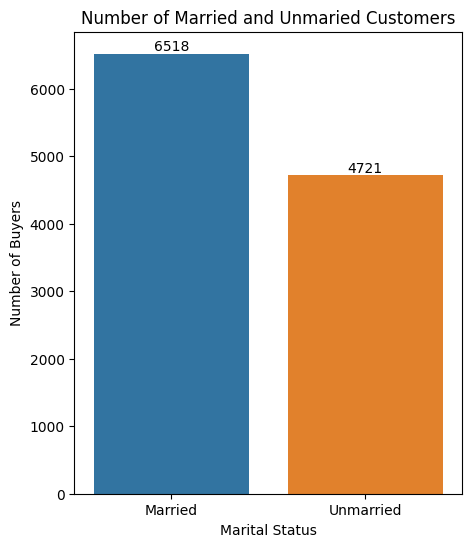

In [23]:
plt.figure(figsize=(5,6))
ax = sns.countplot(data = df, x = 'Marital_Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Buyers')
plt.title('Number of Married and Unmaried Customers')

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

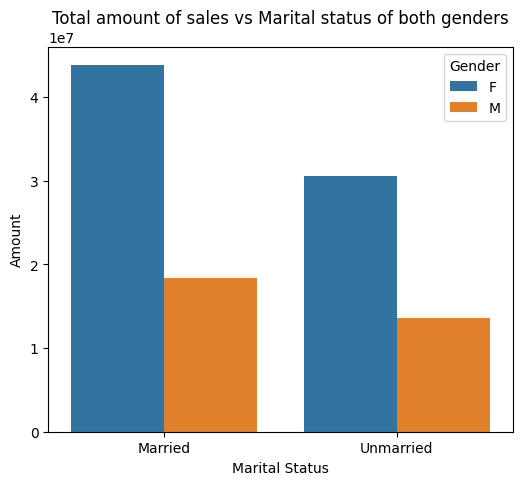

In [24]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

plt.figure(figsize= (6,5))
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')
plt.xlabel('Marital Status')
plt.ylabel('Amount')
plt.title('Total amount of sales vs Marital status of both genders')

plt.show()

- *From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

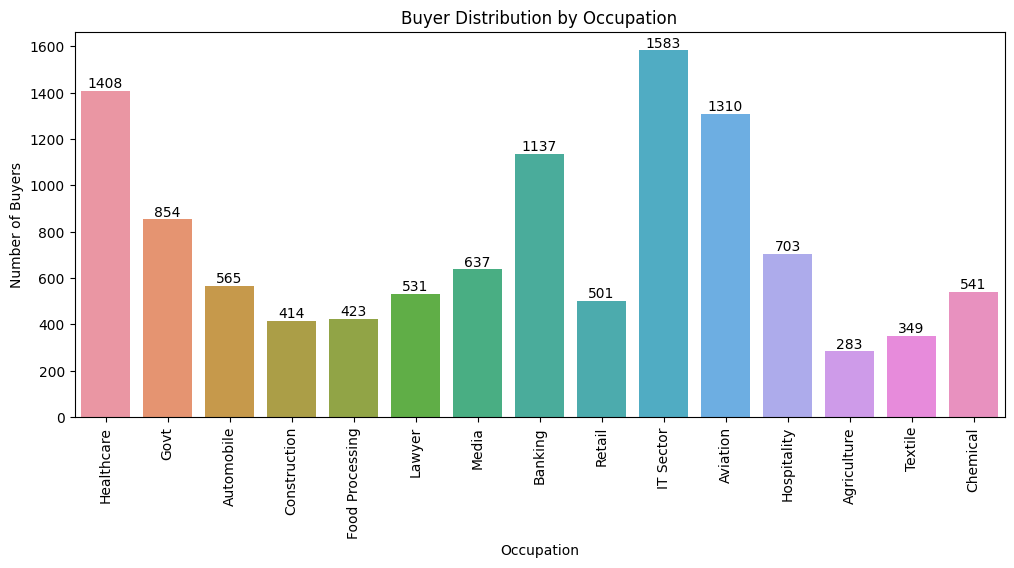

In [25]:
plt.figure(figsize= (12,5))

ax = sns.countplot(data = df, x = 'Occupation')
plt.xticks(rotation='vertical')
plt.xlabel('Occupation')
plt.ylabel('Number of Buyers')
plt.title('Buyer Distribution by Occupation')

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

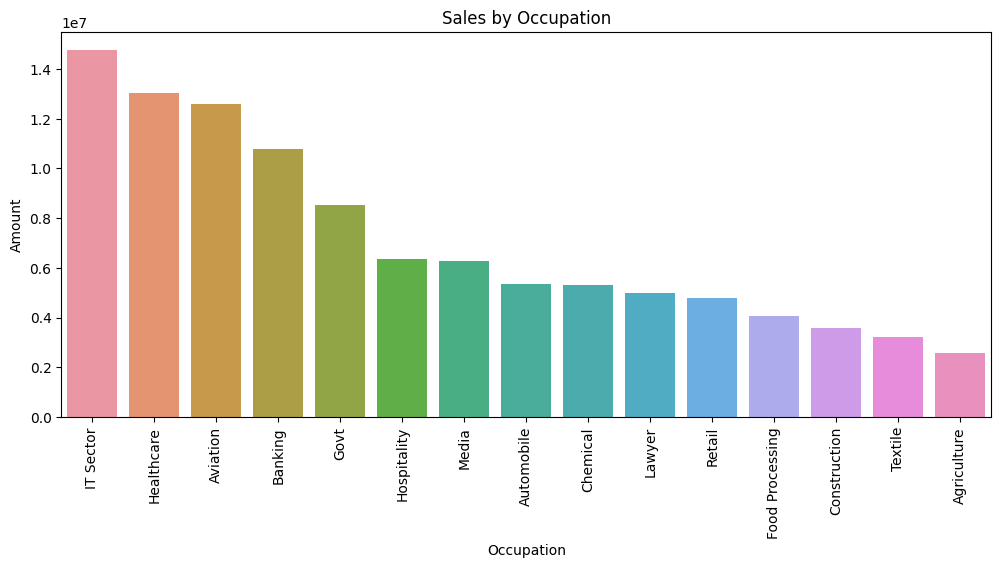

In [26]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

plt.figure(figsize= (12,5))
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')
plt.xticks(rotation='vertical')
plt.xlabel('Occupation')
plt.ylabel('Amount')
plt.title('Sales by Occupation')

plt.show()

- *From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

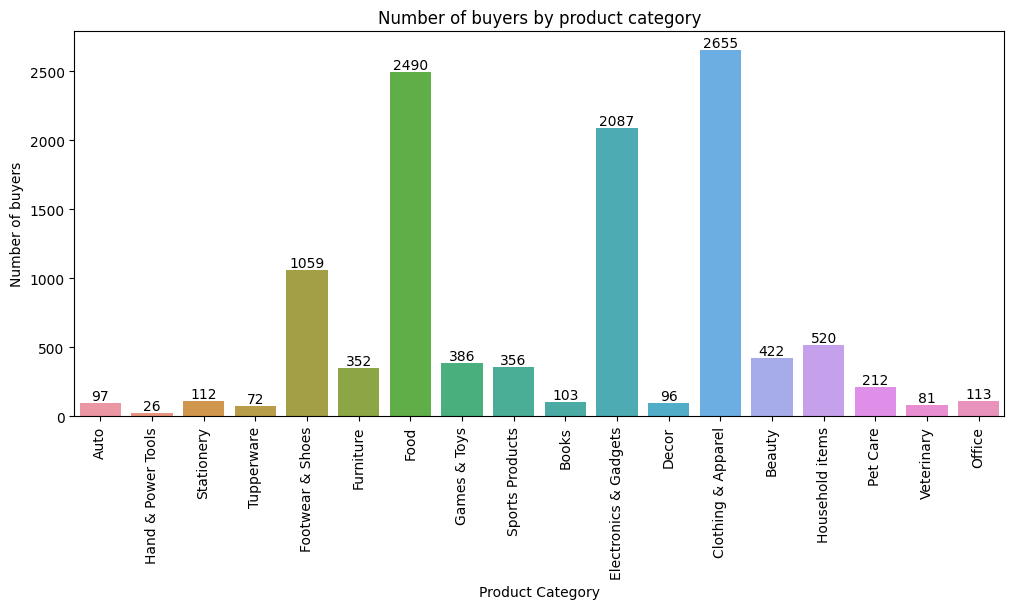

In [27]:
plt.figure(figsize= (12,5))
ax = sns.countplot(data = df, x = 'Product_Category')
plt.xticks(rotation='vertical')
plt.xlabel('Product Category')
plt.ylabel('Number of buyers')
plt.title('Number of buyers by product category')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

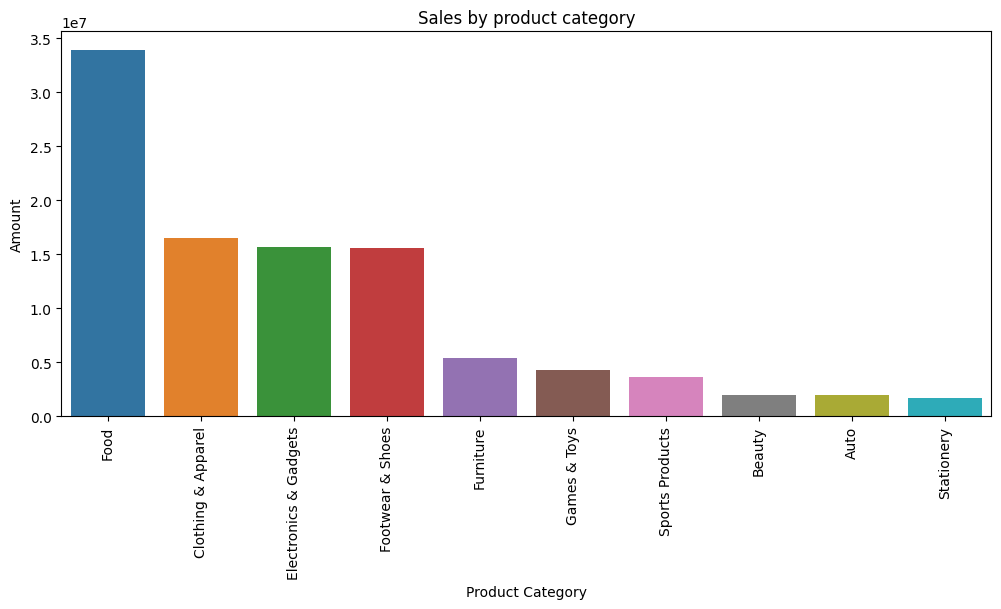

In [28]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

plt.figure(figsize= (12,5))
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')
plt.xticks(rotation='vertical')
plt.xlabel('Product Category')
plt.ylabel('Amount')
plt.title('Sales by product category')


plt.show()


- *From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

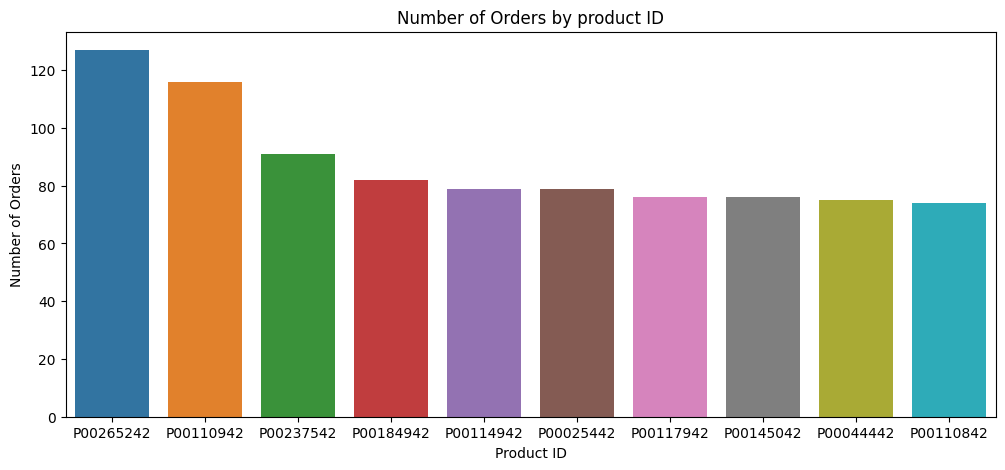

In [29]:
# top 10 most sold products (same thing as above)
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

plt.figure(figsize= (12,5))
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')
plt.xlabel('Product ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by product ID')

plt.show()

- *From this graph we can see that products with these product IDs are the most sold ones.*

## Key Observations:

- Most of the buyers were females, and their purchasing power surpassed that of men.
- Buyers in the age group of 26-35 years, especially females, constituted a significant portion of the customer base.
- Uttar Pradesh, Maharashtra, and Karnataka were the top states contributing to the majority of orders and total sales.
- Married women demonstrated a higher purchasing power compared to other demographics.
- Occupations in IT, Healthcare, and Aviation sectors were prominent among buyers.
- The most sold product categories included Food, Clothing, and Electronics**.
- Top Sold Products:
  We identified the top 10 most sold products based on the number of orders, providing insights into customer preferences and popular product choices.

## Conclusions:
The Diwali Sales Analysis project provided valuable insights into customer behavior and sales trends during the festive season. The data revealed patterns that can be leveraged to optimize marketing strategies, target specific customer demographics, and tailor product offerings. Understanding the preferences of different age groups, genders, and regions can assist businesses in making informed decisions to enhance their sales and profitability.

The project showcased the power of data analysis and visualization in extracting meaningful information from raw data. By applying data science techniques, we transformed raw sales data into actionable insights, contributing to effective decision-making and strategic planning.